# Example Map Plotting SCRIP grid

This notebook shows how to plot a world with a grid from unstructure grid file. Use the NPL-3.7.9 kernel.

### At the start of a Jupyter notebook you need to import all modules that you will use

In [15]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                 # For plotting maps
import cartopy.feature as cfeature         # For plotting maps
from matplotlib.collections import PolyCollection

### Define the directories and file of interest for your results. This can be shortened to less lines as well.

Loading all of the available CAM-chem output. Note this will take a long time (~3 and a half minutes) if you load all the years.

In [37]:
result_dir = "/glade/work/buchholz/cheyenne_cases/musica/repo/ne0np4.AUSGRID03.ne30x8/grids/"
files = "AUSGRID03_ne30x8_np4_SCRIP.nc"
grid_load = xr.open_mfdataset(result_dir+files,combine='by_coords',concat_dim='time')

In [38]:
grid_load

<xarray.Dataset>
Dimensions:          (grid_corners: 12, grid_rank: 1, grid_size: 156170)
Dimensions without coordinates: grid_corners, grid_rank, grid_size
Data variables:
    grid_dims        (grid_rank) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    grid_imask       (grid_size) int32 dask.array<chunksize=(156170,), meta=np.ndarray>
    grid_area        (grid_size) float64 dask.array<chunksize=(156170,), meta=np.ndarray>
    grid_center_lat  (grid_size) float64 dask.array<chunksize=(156170,), meta=np.ndarray>
    grid_center_lon  (grid_size) float64 dask.array<chunksize=(156170,), meta=np.ndarray>
    grid_corner_lat  (grid_size, grid_corners) float64 dask.array<chunksize=(156170, 12), meta=np.ndarray>
    grid_corner_lon  (grid_size, grid_corners) float64 dask.array<chunksize=(156170, 12), meta=np.ndarray>
    rrfac            (grid_size) float64 dask.array<chunksize=(156170,), meta=np.ndarray>
Attributes:
    Grid:        Variable Resolution: AUSGRID03_ne30x8_EXODUS.nc
    Created by:  Gen_ControlVolumes.exe

In [39]:
corner_lon = np.copy(grid_load.grid_corner_lon.values )
corner_lat = np.copy(grid_load.grid_corner_lat.values )
center_lon = np.copy(grid_load.grid_center_lon.values )
center_lat = np.copy(grid_load.grid_center_lat.values )          

In [40]:
verts = np.concatenate( ( corner_lon, corner_lat ), axis=1)

In [41]:
verts.shape

(156170, 24)

### Plot

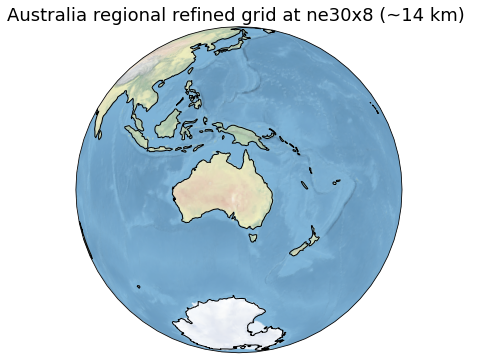

In [44]:
plt.figure(figsize=(10,6))

#Define projection
ax = plt.axes(projection=ccrs.Orthographic(140, -25))


ax.stock_img()
# add coastlines
ax.add_feature(cfeature.COASTLINE)

#add lat lon grids
#gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.8, linestyle='--',linewidth=2,)
#gl.top_labels = False
#gl.right_labels = False
#gl.xlabel_style = {'size': 22, 'color': 'gray'}
#gl.ylabel_style = {'size': 22, 'color': 'gray'}


# Titles
# Main
plt.title('Australia regional refined grid at ne30x8 (~14 km) ',fontsize=18)

plt.show()
#plt.savefig('2014_O3.png')